In [1]:
import torch
import torchvision
from torchvision import models, transforms
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/ResNet.pth"

In [4]:
root=  "/content/drive/MyDrive/BinarySplit"

In [6]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
model = torchvision.models.resnet18(pretrained=False, num_classes=2)
model.load_state_dict(torch.load(path))
model = torch.nn.Sequential(*list(model.children())[:-1])

model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [9]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [10]:
data = torchvision.datasets.ImageFolder(root, transform=transform)

In [11]:
features = []
labels_list = []

class_names = data.classes

for inputs, labels in data:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy())
        labels_list.append(labels)

features_np = np.array(features)

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_np)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19971 samples in 0.007s...
[t-SNE] Computed neighbors for 19971 samples in 2.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19971
[t-SNE] Computed conditional probabilities for sample 2000 / 19971
[t-SNE] Computed conditional probabilities for sample 3000 / 19971
[t-SNE] Computed conditional probabilities for sample 4000 / 19971
[t-SNE] Computed conditional probabilities for sample 5000 / 19971
[t-SNE] Computed conditional probabilities for sample 6000 / 19971
[t-SNE] Computed conditional probabilities for sample 7000 / 19971
[t-SNE] Computed conditional probabilities for sample 8000 / 19971
[t-SNE] Computed conditional probabilities for sample 9000 / 19971
[t-SNE] Computed conditional probabilities for sample 10000 / 19971
[t-SNE] Computed conditional probabilities for sample 11000 / 19971
[t-SNE] Computed conditional probabilities for sample 12000 / 19971
[t-SNE] Computed conditional probabilities for sa

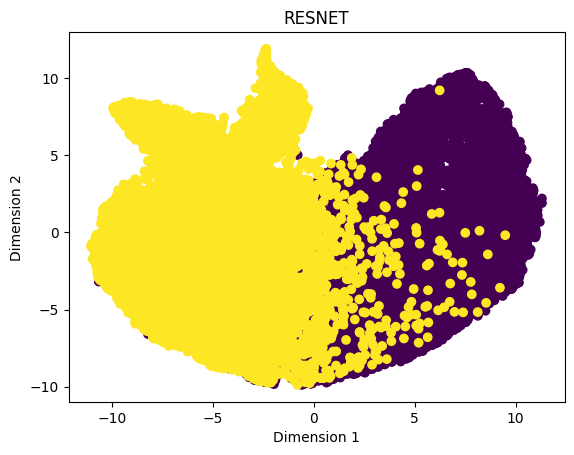

In [14]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_list)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("RESNET")
plt.show()